In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

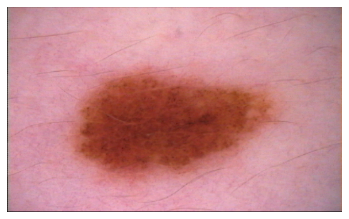

In [18]:
img = cv2.imread("../data/samples/F995.BMP", cv2.IMREAD_COLOR)
img_gray = cv2.imread("../data/samples/F995.BMP", cv2.IMREAD_GRAYSCALE)

plt.axis('off')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

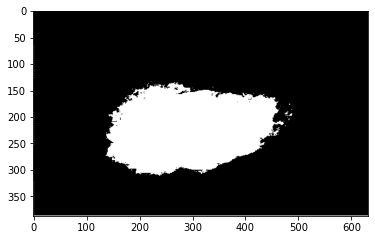

In [19]:
ret, thresh1 = cv2.threshold(img_gray, 110, 255, cv2.THRESH_BINARY)

img_inverted = cv2.bitwise_not(thresh1)

plt.imshow(cv2.cvtColor(img_inverted,cv2.COLOR_BGR2RGB))

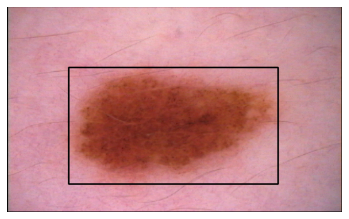

In [22]:
# Erode to erase little noises.
eroded = cv2.erode(img_inverted, (1,2), iterations = 1) 
# Use the dilation to get an area to get in a rectangle.
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45,45))
dilation = cv2.dilate(eroded, rect_kernel, iterations = 1) 
# Get the contours of the text.
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL,  
                                                 cv2.CHAIN_APPROX_NONE)
# Copy the image.
img_rect = img

for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
      
    # Drawing a rectangle on copied image 
    rect = cv2.rectangle(img_rect, (x, y), (x + w, y + h), (0, 0, 0), 2)

plt.axis('off')
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))

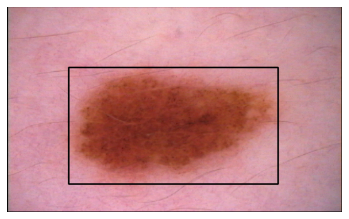

In [23]:
for cnt in contours: 
    x, y, w, h = cv2.boundingRect(cnt) 
    
    img_cropped = img_rect[y:y+h, x:x+w]

plt.axis('off')
plt.imshow(cv2.cvtColor(img_cropped, cv2.COLOR_BGR2RGB))